# Logistic Regression
In this notebook, we implemented and evaluated a Logistic Regression model to to predict **auto loan default** (bad_flag).

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from preprocessing import load_data, preprocess_data
from model_evaluation import evaluate_models, tune_hyperparameters, feature_importance, threshold_analysis, cross_val_pr_curve, cross_val_roc_curve
from sklearn.metrics import classification_report
import shap

## Load & Preprocess Data

In [2]:
train_path = "/Users/heba/Desktop/Erdos/Training Dataset A_R-384891_Candidate Attach #1_PresSE_SRF #1142.csv"
eval_path = "/Users/heba/Desktop/Erdos/Evaluation Dataset B_R-384891_Candidate Attach #2_PresSE_SRF #1142.csv"

df_train, df_eval = load_data(train_path, eval_path)
X_train_processed, y_train, X_eval_processed, y_eval, to_drop_corr, cols_to_drop, preprocessor = preprocess_data(df_train, df_eval)

print("Train shape:", X_train_processed.shape)
print("Eval shape:", X_eval_processed.shape)

Train shape: (21348, 28)
Eval shape: (5336, 28)


In [3]:
print("Train class distribution AFTER flip:")
print(y_train.value_counts())

print("Eval class distribution AFTER flip:")
print(y_eval.value_counts())


Train class distribution AFTER flip:
bad_flag
0    20390
1      958
Name: count, dtype: int64
Eval class distribution AFTER flip:
bad_flag
0    5094
1     242
Name: count, dtype: int64


## Logistic Regression

CV Scores: [0.113879   0.10763889 0.10219319]
Mean CV Score: 0.10790369318948878
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.71      0.82     20390
           1       0.11      0.75      0.19       958

    accuracy                           0.71     21348
   macro avg       0.55      0.73      0.51     21348
weighted avg       0.94      0.71      0.79     21348



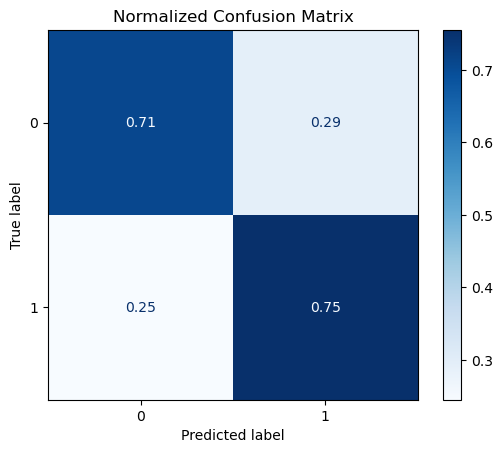

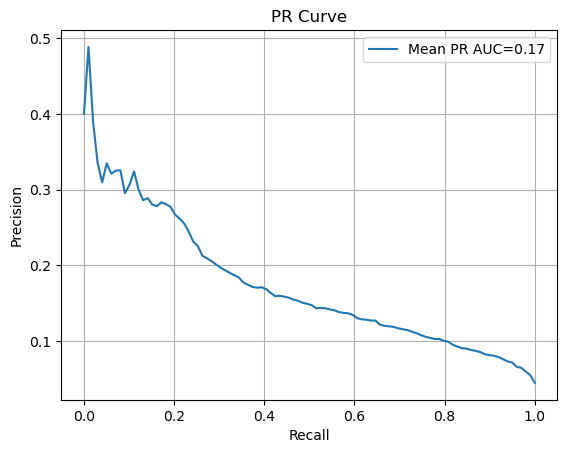

Mean PR AUC: 0.1736


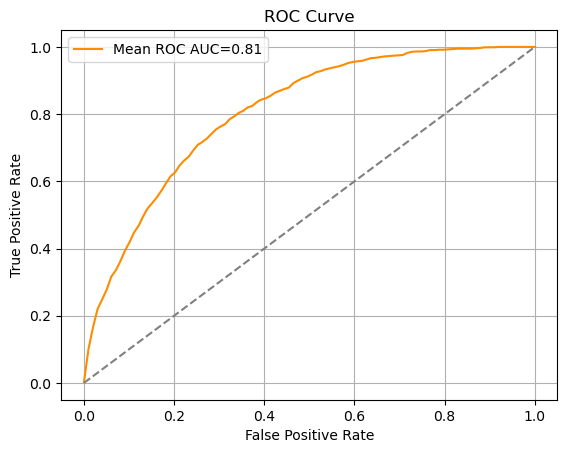

Mean ROC AUC: 0.8063


,precision,recall,f1-score,support
0,0.983962,0.707111,0.822875,20390.000000
1,0.107991,0.754697,0.188946,958.000000
accuracy,0.709247,0.709247,0.709247,0.709247
macro avg,0.545977,0.730904,0.505910,21348.000000
weighted avg,0.944653,0.709247,0.794427,21348.000000


In [4]:
logreg = LogisticRegression(max_iter=5000, class_weight='balanced')
evaluate_models(logreg, X_train_processed, y_train)

Best Params: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
CV Scores: [0.11371681 0.1078516  0.10199351]
Mean CV Score: 0.10785397328895217
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.71      0.82     20390
           1       0.11      0.76      0.19       958

    accuracy                           0.71     21348
   macro avg       0.55      0.73      0.51     21348
weighted avg       0.94      0.71      0.79     21348



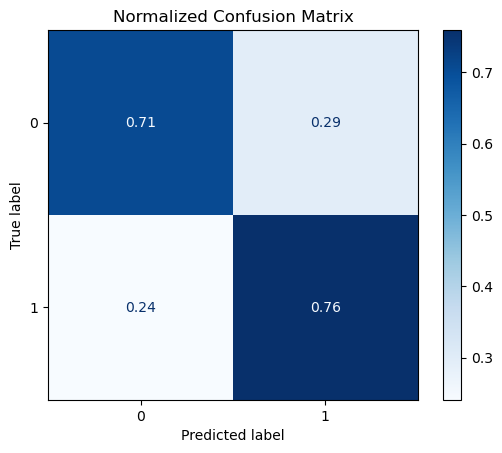

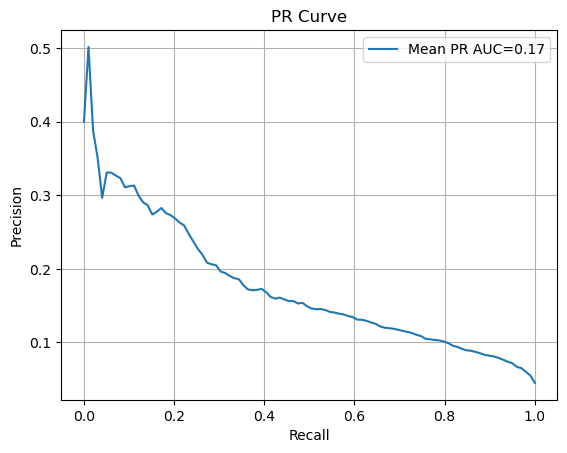

Mean PR AUC: 0.1736


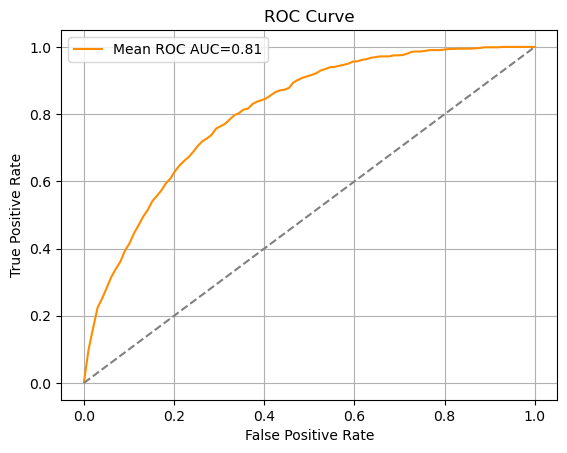

Mean ROC AUC: 0.8065


,precision,recall,f1-score,support
0,0.984192,0.705346,0.821758,20390.000000
1,0.107944,0.758873,0.189003,958.000000
accuracy,0.707748,0.707748,0.707748,0.707748
macro avg,0.546068,0.732109,0.505381,21348.000000
weighted avg,0.944870,0.707748,0.793363,21348.000000


In [5]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # Needed for L1
}

grid = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced'), param_grid, scoring='f1', cv=3)
grid.fit(X_train_processed, y_train)

print("Best Params:", grid.best_params_)
evaluate_models(grid.best_estimator_, X_train_processed, y_train)

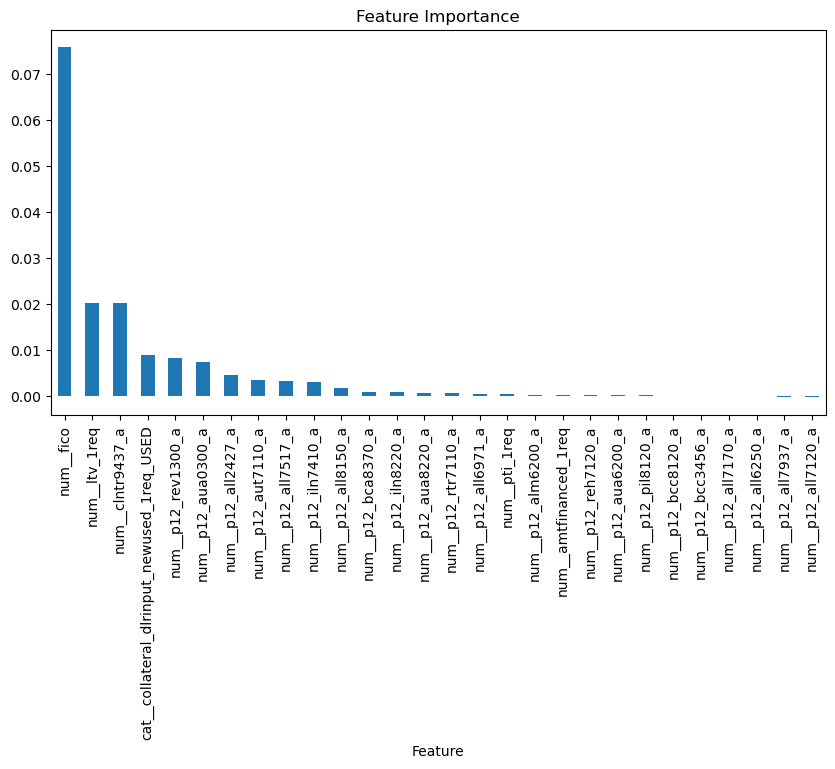

,Feature,Importance
0,num__fico,0.075797
3,num__ltv_1req,0.020299
26,num__clntr9437_a,0.020126
27,cat__collateral_dlrinput_newused_1req_USED,0.009026
11,num__p12_rev1300_a,0.008204
19,num__p12_aua0300_a,0.007438
23,num__p12_all2427_a,0.004522
6,num__p12_aut7110_a,0.003408
14,num__p12_all7517_a,0.003355
10,num__p12_iln7410_a,0.003029


In [6]:
X_named = pd.DataFrame(X_train_processed, columns=preprocessor.get_feature_names_out())

logreg = LogisticRegression(max_iter=5000, class_weight='balanced')
logreg.fit(X_named, y_train)


feature_importance(logreg, X_named, y_train, metric='average_precision')


=== Final Evaluation on Test Set ===
              precision    recall  f1-score   support

           0       0.99      0.53      0.69      5094
           1       0.08      0.88      0.15       242

    accuracy                           0.55      5336
   macro avg       0.54      0.71      0.42      5336
weighted avg       0.95      0.55      0.67      5336



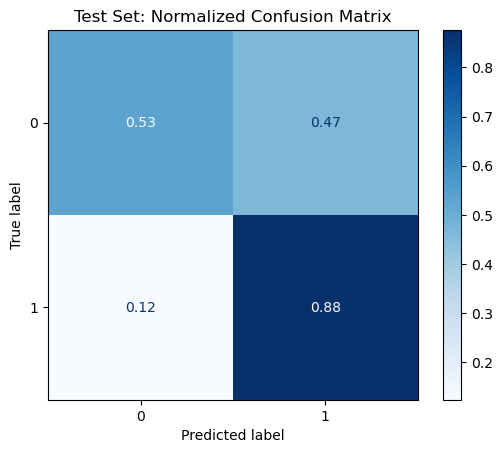

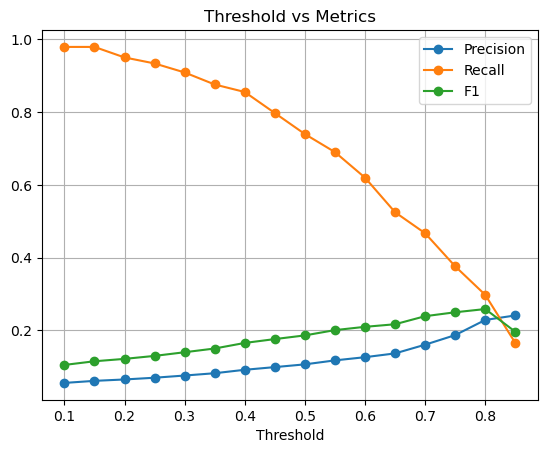

,Threshold,Precision,Recall,F1
0,0.10,0.055387,0.979339,0.104844
1,0.15,0.061051,0.979339,0.114937
2,0.20,0.064898,0.950413,0.121500
3,0.25,0.069689,0.933884,0.129699
4,0.30,0.075705,0.909091,0.139771
5,0.35,0.082043,0.876033,0.150035
6,0.40,0.091512,0.855372,0.165335
7,0.45,0.098873,0.797521,0.175934
8,0.50,0.106421,0.739669,0.186071
9,0.55,0.117358,0.690083,0.200601


In [7]:
import matplotlib.pyplot as plt

X_eval_named = pd.DataFrame(X_eval_processed, columns=preprocessor.get_feature_names_out())

#Predict probabilities and labels
y_eval_proba = logreg.predict_proba(X_eval_named)[:, 1]
y_eval_pred = (y_eval_proba >= 0.35).astype(int)  # Change threshold if you tuned it

#Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print("=== Final Evaluation on Test Set ===")
print(classification_report(y_eval, y_eval_pred))

#Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_eval, y_eval_pred, normalize='true', cmap='Blues')
plt.title("Test Set: Normalized Confusion Matrix")
plt.grid(False)
plt.show()

#Precision-Recall / ROC Curve on Test Set
from model_evaluation import threshold_analysis
threshold_analysis(y_eval, y_eval_proba)
